In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob, os
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
from datetime import datetime, date, time
import time
from scipy import stats
# import carbon_utils
# import PyCO2SYS as pyco2
from scipy import interpolate
from tabulate import tabulate
import re
import matplotlib.gridspec as gridspec
from io import StringIO  # for creating a string buffer to store the table
import pressure_level_glodap_mean as pl
from multiprocessing import Process
import glodap_crossover_v_pressure_parallel2 as gpar2
import subprocess


In [2]:
# glodap_offsets_filename = 'glodap_offsets_100km_1450_to_2000_100m_0.005dens_0.005spice_4.nc'
# glodap_offsets_filename = 'glodap_offsets_100km_2_to_50_50m_0.1dens_0.1spice_5.nc'
# read in a user-created text file to point to local directories to avoid having to change this every time 
# we update code
lines=[]
with open('path_file.txt') as f:
    lines = f.readlines()
    
count = 0
for line in lines:
    count += 1
    index = line.find("=")
    #print(f'line {count}: {line}')
    #print(index)
    #print(line[0:index])
    line = line.rstrip()
    if line[0:index].find("argo")>=0:
        argo_path=line[index+1:]
    elif line[0:index].find("liar")>=0:
        liar_dir=line[index+1:]
    elif line[0:index].find("matlab")>=0:
        matlab_dir=line[index+1:]
        
# Set the paths
output_dir = 'output/'
data_dir = 'data/'

# Check for a glodap_offsets_plots directory, create if it does not exist
offset_dir = output_dir + 'glodap_offset_plots/'
if not os.path.isdir(offset_dir):
    os.mkdir(offset_dir)
grouped_plot_dir = offset_dir + 'grouped_plots/levels_mean_saved/'
if not os.path.isdir(grouped_plot_dir):
    os.mkdir(grouped_plot_dir)



In [7]:
# # Define the arguments
# glodap_offsets_filenames = ['glodap_offsets_100km_1_to_550_50m_0.05dens_0.05spice_6.nc', 'glodap_offsets_100km_400_to_2100_100m_0.005dens_0.005spice_6.nc']
# pressure_levels = [0, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 2000]
# year_filt = 1
# year_plus_minus = 5

# # Construct the command
# command = [
#     "python",
#     "test_parallel_args2.py",
#     "--argo_path", argo_path,
#     "--output_dir", output_dir,
#     "--grouped_plot_dir", grouped_plot_dir,
#     "--glodap_offsets_filenames", *glodap_offsets_filenames,
#     "--pressure_levels", *map(str, pressure_levels),  # Convert pressure levels to strings
#     "--year_filt", str(year_filt),
#     "--year_plus_minus", str(year_plus_minus)
# ]

# # Run the command
# subprocess.run(command)


# # # Specify the message to be passed as a command-line argument
# # message_to_pass = "Hello from Jupyter!"

# # # Run the Python script with the message argument
# # subprocess.run(["python", "test_parallel_args.py", message_to_pass])

Executing main_pressure_process with the following arguments:
argo_path: /Users/smb-uh/UHM_Ocean_BGC_Group Dropbox/Datasets/Data_Products/BGC_ARGO_GLOBAL/2023_06_20/Sprof/
output_dir: output/
grouped_plot_dir: output/glodap_offset_plots/grouped_plots/level_means_saved/
glodap_offsets_filenames: ['glodap_offsets_100km_1_to_550_50m_0.05dens_0.05spice_6.nc', 'glodap_offsets_100km_400_to_2100_100m_0.005dens_0.005spice_6.nc']
pressure_levels: [0, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 2000]
year_filt: 1
year_plus_minus: 5
starting main pressure level processing
[<Process name='Process-1' parent=29007 initial>]
[<Process name='Process-1' parent=29007 initial>, <Process name='Process-2' parent=29007 initial>]
[<Process name='Process-1' parent=29007 initial>, <Process name='Process-2' parent=29007 initial>, <Process name='Process-3' parent=29007 initial>]
[<Process name='Process-1' parent=29007 initial>, <Process name='Process-2' parent=29007 initial>, <Process name='Process-3' parent

Process Process-2:
Process Process-5:
Process Process-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/smb-uh/UHM_Ocean_BGC_Group Dropbox/Seth Bushinsky/Work/Manuscripts/2022_07 Deep O2 Bias/argo_deep_o2_bias/pressure_level_glodap_mean.py", line 85, in pressure_level_filter
    ESD_test_out = outlier.ESD_Test(g.DOXY_ADJUSTED_offset.dropna(dim="N_CROSSOVERS", how="any").values, 0.05, test_num, False, True)
  File "/Users/smb-uh/UHM_Ocean_BGC_Group Dropbox/Seth Bushinsky/Work/Manuscripts/2022_07 Deep O2 Bias/argo_deep_o2_bias/outlier_filter_ESD_test.py", line 50, in ESD_Test
    print('Ha:  there are up to 10 outliers in the da

KeyboardInterrupt: 

In [ ]:
# # Loop through each dataset
# # calculate DOX_ADJUSTED_offset_trimmed, using only data from a specific depth range 
# year_filt = 1
# year_plus_minus = 5
# pressure_levels = [0, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 2000]  # Adjust as needed
# # pressure_levels = [0, 100, 200]#, 300]#, 400, 500, 750, 1000, 1250, 1500, 2000]  # Adjust as needed

# glodap_offsets_filenames = ['glodap_offsets_100km_1_to_550_50m_0.05dens_0.05spice_6.nc', 'glodap_offsets_100km_400_to_2100_100m_0.005dens_0.005spice_6.nc']

# #if __name__ == '__main__':
# # pass list of filenames and pressure levels to loop through and average, saving out to netcdf files 
# gpar2.main_pressure_process(argo_path, output_dir, grouped_plot_dir, glodap_offsets_filenames, pressure_levels, year_filt, year_plus_minus)


TypeError: main_pressure_process() takes 5 positional arguments but 7 were given

Traceback (most recent call last):
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/multip

In [4]:
# #list of DOXY_ADJUSTED SCIENTIFIC_CALIB_COMMENT substrings to group together for bias analysis

# #no calibration bad data
# bad_cal_list = ['Sensor issue','out of order','Bad data; not adjustable','Biofouling','unadjustable']

# #no calibration, reason unspecified
# no_cal_list = ['no adjustment','No QC','none','not applicable']

# #blank cal
# blank_cal = ['                ']

# #air cal
# # air_cal_list = ['DOXY_ADJUSTED corrected using co','SVU Foil','Partial pressure','Bittig',
# #                 'Adjusted with SAGEO2 using co','Adjusted with SAGEO2 with in-air',
# #                 'PPOX converted from DOXY','G determined from float measure']
# air_cal_list = ['in air', 'in-air']
# #no air cal
# noair_cal_surf_list = ['World Ocean Atlas', 'woa', 'WOA', 'no in-air', 'no in air', 
#                        'climatology','DOXY_QCs are modified during visual check',
#                       'Takeshita']
# # ['DOXY_ADJUSTED is computed from','DOXY_ADJUSTED is estimated from',
# #                        'Adjustment done on PPOX_DOXY;Tem','Polynomial calibration','Adjustment via comparison of',
# #                       'optode multi calibration','RT adjustment by comparison','adjusted with median',
# #                       'Adjusted with annual WOA','Adjusted on WOA monthly','Adjusted PPOX at zero for',
# #                       'G determined by surface']

# noair_cal_subsurf_list = []
# # ['1-point multiplicative corr']

# noair_cal_funcofdoxy_list = []
# # ['Percent saturation corrected as','DOXY_ADJUSTED computed using Ste',
# #                         'Oxygen concentration corrected']

# noair_cal_unspec_list = []
# # ['DOXY_ADJUSTED corrected based','Adjust with WOA monthly','GAIN determined from WOA2013',
# #                         'Adjusted with WOA climatology','Adjusted with SAGEO2 based on WO',
# #                          'Adjusted with SAGEO2 on WOA','Adjusted with WOA 2018','Takeshita and all, 2013']

# noair_cal_withdrift_list = []
# # ['Adjustment done on PPOX_DOXY;Tem'] #this is incomplete

# noair_cal_combined_list = noair_cal_surf_list+noair_cal_subsurf_list+noair_cal_funcofdoxy_list+noair_cal_unspec_list

In [3]:
# # loop through various glodap_offset plots, calculating trimmed mean for different pressure levels and storing for comparison
# glodap_offsets = []
# glodap_offsets_filenames = ['glodap_offsets_100km_1_to_550_50m_0.05dens_0.05spice_6.nc', 'glodap_offsets_100km_400_to_2100_100m_0.005dens_0.005spice_6.nc']

# for filename in glodap_offsets_filenames:
#     ds = xr.load_dataset(output_dir+filename)
#     glodap_offsets.append(ds)

In [ ]:

# mean_gdap_offsets = {}

# year_filt = 1
# year_plus_minus = 5
# var_list_plot = ['PRES_ADJUSTED','TEMP_ADJUSTED','PSAL_ADJUSTED','DOXY_ADJUSTED','NITRATE_ADJUSTED',
#                     'DIC','pH_25C_TOTAL_ADJUSTED','PH_IN_SITU_TOTAL_ADJUSTED','PDENS']

# process_list = []
# for idx, gdap_offsets_n in enumerate(glodap_offsets):

#     # trimmed_means = {}
#     # variables with offsets that you want to trim


#     for j in range(len(pressure_levels) - 1):
#         # make a temporary copy of gdap_offsets_n to use for the pressure level
#         gdap_offsets_n_temp = gdap_offsets_n.copy()       
#         if __name__ == '__main__':
#             p = Process(target=pl.pressure_level_filter, args=(argo_path,grouped_plot_dir,glodap_offsets_filenames[idx][0:-3],gdap_offsets_n_temp, \
#                                                                var_list_plot,year_filt,pressure_levels[j],pressure_levels[j+1],year_plus_minus, ))
#                                                         #    output_dir=grouped_plot_dir, out_filename = glodap_offsets_filenames[idx][0:-3], \
#                                 #  gdap_offsets_n_temp=gdap_offsets_n_temp, var_list_plot=var_list_plot, year_filt=year_filt, pressure_level_min=pressure_levels[j],\
#                                 #   pressure_level_max=pressure_levels[j+1], year_plus_minus=year_plus_minus,))
#             process_list.append(p)
#         # pl.pressure_level_filter(argo_path=argo_path, output_dir=grouped_plot_dir, out_filename = glodap_offsets_filenames[idx][0:-3], \
#         #                          gdap_offsets_n_temp=gdap_offsets_n_temp, var_list_plot=var_list_plot, year_filt=year_filt, pressure_level_min=pressure_levels[j],\
#         #                           pressure_level_max=pressure_levels[j+1], year_plus_minus=year_plus_minus)
#         # break
#     # break
 
#         # # set all data not at that pressure level to nan                  
#         # for var in var_list_plot:
#         #     pressure_index = np.logical_and(gdap_offsets_n_temp['PRES_ADJUSTED_float']>pressure_levels[j], 
#         #                             gdap_offsets_n_temp['PRES_ADJUSTED_float']<=pressure_levels[j+1])

#         #     if year_filt==0:
#         #         gdap_offsets_n_temp[var + '_float'] = gdap_offsets_n_temp[var + '_float'].where(pressure_index)
#         #         gdap_offsets_n_temp[var + '_glodap'] = gdap_offsets_n_temp[var + '_glodap'].where(pressure_index)
#         #         gdap_offsets_n_temp[var + '_offset'] = gdap_offsets_n_temp[var + '_offset'].where(pressure_index)
#         #     elif year_filt==1:
#         #         year_index = np.abs(gdap_offsets_n_temp.main_float_juld.dt.year-gdap_offsets_n_temp.glodap_datetime.dt.year)<=year_plus_minus
#         #         gdap_offsets_n_temp[var + '_float'] = \
#         #             gdap_offsets_n_temp[var + '_float'].where(np.logical_and(pressure_index, year_index))
#         #         gdap_offsets_n_temp[var + '_glodap'] = \
#         #             gdap_offsets_n_temp[var + '_glodap'].where(np.logical_and(pressure_index, year_index))
#         #         gdap_offsets_n_temp[var + '_offset'] = \
#         #             gdap_offsets_n_temp[var + '_offset'].where(np.logical_and(pressure_index, year_index))
                
#         # # then group by wmo and proceed with DOXY_trimmed calculations
#         # offsets_g = gdap_offsets_n_temp.groupby(gdap_offsets_n_temp.main_float_wmo)

#         # if pressure_levels[j]<=400:
#         #     # adding option to filter by time of year as well - for use in surface data
#         #     time_filt = 1
#         #     filt_days = 10
#         # else:
#         #     time_filt=0

        
#         # DOXY_ADJUSTED_offset_trimmed = []
#         # for n,g in offsets_g:

#         #     # run a GESD test using "test_num" number of possible outliers
#         #     test_num = int((len(g.DOXY_ADJUSTED_offset.dropna(dim="N_CROSSOVERS", how="any").values)*.1))
#         #     ESD_test_out = ESD_Test(g.DOXY_ADJUSTED_offset.dropna(dim="N_CROSSOVERS", how="any").values, 0.05, test_num, False, True)

#         #     # create temp_o2_offest to set all datapoints to nans that the GESD test says are outliers
#         #     if time_filt==1:
#         #         within_days = np.logical_or(np.abs(g.main_float_juld.dt.dayofyear - g.glodap_datetime.dt.dayofyear)<=filt_days, 
#         #                         np.abs(g.main_float_juld.dt.dayofyear - g.glodap_datetime.dt.dayofyear)>(365-filt_days)) 
#         #         temp_o2_offset = g.DOXY_ADJUSTED_offset.where(within_days)
#         #     else:
#         #         temp_o2_offset = g.DOXY_ADJUSTED_offset
#         #     for a in range(0, ESD_test_out[1]):
#         #         temp_o2_offset = temp_o2_offset.where(temp_o2_offset != ESD_test_out[2][a])
                
#         #     # append each temp_o2_offset to the new DOXY_ADJUSTED_offset_trimmed vector
#         #     DOXY_ADJUSTED_offset_trimmed.append(temp_o2_offset.values)
#         #     #print(len(DOXY_ADJUSTED_offset_trimmed))
#         #     # break
        
#         # # concatenate all vectors within DOXY_ADJUSTED_offset_trimmed (each represents one WMO)
#         # result_vector = np.concatenate(DOXY_ADJUSTED_offset_trimmed)
#         # # convert to Xarray DataArray
#         # result_da = xr.DataArray(result_vector, dims='N_CROSSOVERS', coords={'N_CROSSOVERS': gdap_offsets_n_temp['N_CROSSOVERS']})
#         # # add to glodap_offsets
#         # gdap_offsets_n_temp['DOXY_ADJUSTED_offset_trimmed']=result_da
#         # # print(glodap_offsets)

#         # # then group again by WMO, now with the new variable:
#         # offsets_g = gdap_offsets_n_temp.groupby(gdap_offsets_n_temp.main_float_wmo)

#         # glodap_offsets_mean = offsets_g.mean(skipna='True')

#         # #initialise metadata DataArrays
#         # varnames = ['o2_calib_comment','o2_calib_equation','o2_calib_coeff','o2_calib_group','o2_calib_air_group',
#         #         'o2_calib_drift','project_name','plat_type','data_centre']
#         # coord= range(glodap_offsets_mean.main_float_wmo.shape[0])
#         # for v in varnames:
#         #     glodap_offsets_mean[v] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)

#         # #also create groups by sensor 
#         # glodap_offsets_mean['pH_group'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)
#         # glodap_offsets_mean['pH_sensor'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)
#         # glodap_offsets_mean['nitrate_group'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)
#         # glodap_offsets_mean['nitrate_sensor'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)
#         # glodap_offsets_mean['DOXY_group'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)
#         # glodap_offsets_mean['DOXY_sensor'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)

#         # #group for floats that have some under ice profiles with some air calibrated some not
#         # glodap_offsets_mean['ice_group'] = xr.DataArray(dims=['main_float_wmo'],coords={'main_float_wmo':coord}).astype(str)

#         # num_crossovers = glodap_offsets_mean.main_float_wmo.size

#         # # loop through each wmo in offsets
#         # for n,w in enumerate(glodap_offsets_mean.main_float_wmo):
            
#         #     #find full float file matching offset
#         #     wmo_n = w.values
#         #     fn = argo_path + str(wmo_n) + '_Sprof.nc'
#         #     float_og = xr.open_dataset(fn)
            
#         #     #also load meta file  for same float
#         #     fn1 = argo_path + str(wmo_n) + '_meta.nc'
#         #     meta_og = xr.open_dataset(fn1)

#         #     #option for multiple calibrations at different times- default to use most recent only for now?
#         #     #O2 calibration
#         #     #if len(float_og.N_CALIB) >1 :
#         #         #print(str(g.values)+' has more than 1 calibration')
            
#         #     no_cal = []
#         #     if 'DOXY_ADJUSTED' in float_og.keys():
#         #         is_doxy = 'DOXY'
                
#         #         #get O2 sensor type
#         #         #check sensor index
#         #         sensors = meta_og.SENSOR.values
#         #         sind = [idx for idx, s in enumerate(sensors) if 'DOXY' in s.decode("utf-8")] 
#         #         #grab sensor model for index
#         #         if len(sind):
#         #             o2_sensor = meta_og.SENSOR_MODEL.values[sind[0]].decode("utf-8")
#         #         else:
#         #             o2_sensor = 'not listed'

#         #         cal_str = float_og.STATION_PARAMETERS.values.astype(str)[0]
#         #         o2_ind = [idx for idx, s in enumerate(cal_str) if 'DOXY' in s]
#         #         if len(o2_ind):
        
                    
#         #             #get calibration info
#         #             o2_cal_full = float_og.SCIENTIFIC_CALIB_COMMENT.values[:,-1,o2_ind[0]]
#         #             o2_cal_date = float_og.SCIENTIFIC_CALIB_DATE.values[:,-1,o2_ind[0]]
#         #             o2_cal_unique = np.unique(o2_cal_full)
                    
#         #             #check if any unique cal comments are bad/no cal
#         #             isbad = []
#         #             for i in range(len(o2_cal_unique)):
#         #                 o2_cal_i = o2_cal_unique[i].decode("utf-8")
#         #                 if any(substring in o2_cal_i for substring in bad_cal_list) or \
#         #                 any(substring in o2_cal_i for substring in no_cal_list) or \
#         #                 any(substring in o2_cal_i for substring in blank_cal):
#         #                     isbad.append(i)
#         #             #remove bad indices
#         #             o2_cal_unique = np.delete(o2_cal_unique,isbad)

#         #             #check if more than one unique calibration comment remaining after excluding bad data
#         #             if len(o2_cal_unique)>1:
#         #                 print('multiple cal comments')  
#         #                 print(wmo_n)
#         #                 #how to integrate multiple comments? Do any contain different groupings?
#         #                 o2_cal = float_og.SCIENTIFIC_CALIB_COMMENT.values[0,-1,o2_ind[0]].decode("utf-8")
#         #                 if np.any(float_og.POSITION_QC.values==8):
#         #                     under_ice = 'some air cal, some under ice'
#         #                     print('under ice')
#         #                 else:
#         #                     under_ice = 'no ice'
                            
#         #             else:
#         #                 o2_cal = float_og.SCIENTIFIC_CALIB_COMMENT.values[0,-1,o2_ind[0]].decode("utf-8")
#         #             o2_eq = float_og.SCIENTIFIC_CALIB_EQUATION.values[0,-1,o2_ind[0]].decode("utf-8")
#         #             o2_co = float_og.SCIENTIFIC_CALIB_COEFFICIENT.values[0,-1,o2_ind[0]].decode("utf-8")
#         #             under_ice = 'no ice'
#         #         else:
#         #             o2_cal = 'empty O2 calib comment'
#         #             o2_eq = 'none'
#         #             o2_co = 'none'

#         #     else:
#         #         is_doxy = 'no DOXY'
#         #         o2_cal = 'no O2'
#         #         o2_eq = 'none'
#         #         o2_co = 'none'
#         #         o2_sensor = 'none'
            

#         #     ######## group calibration comments into categories
            
#         #     #o2 calib comment groups
#         #     if any(substring in o2_cal for substring in bad_cal_list):
#         #         o2_group = 'bad'
#         #     elif any(substring in o2_cal for substring in no_cal_list):
#         #         o2_group = 'no cal'
#         #     elif any(substring in o2_cal for substring in noair_cal_surf_list): # should catch the "no air cal" ones before they get put in air-cal list...
#         #         o2_group = 'no air surface cal'
#         #     elif any(substring in o2_cal for substring in air_cal_list):
#         #         o2_group = 'air cal'
#         #     elif any(substring in o2_cal for substring in noair_cal_subsurf_list):
#         #         o2_group = 'no air subsurface cal'
#         #     elif any(substring in o2_cal for substring in noair_cal_funcofdoxy_list):
#         #         o2_group = 'no air function of DOXY cal'
#         #     elif any(substring in o2_cal for substring in noair_cal_unspec_list):
#         #         o2_group = 'no air unspecified'
#         #     else:
#         #         o2_group = 'ungrouped'
            
            
#         #     #group O2 air cal and no air cal meta groups
#         #     if any(substring in o2_cal for substring in air_cal_list):
#         #         o2_air_group = 'air cal'
#         #     elif any(substring in o2_cal for substring in noair_cal_combined_list):
#         #         o2_air_group = 'no air cal'
#         #     else:
#         #         o2_air_group = 'no cal/bad'
                
#         #     #separate groups for drift/no drift
#         #     if any(substring in o2_cal for substring in noair_cal_withdrift_list):
#         #         o2_group_drift = 'drift corrected'
#         #     else:
#         #         o2_group_drift = 'no drift corrected'
            
#         #     if 'PH_IN_SITU_TOTAL_ADJUSTED' in float_og.keys():
#         #         is_pH = 'pH'
#         #         #get pH sensor type
#         #         #check sensor index
#         #         sensors = meta_og.SENSOR.values
#         #         sind = [idx for idx, s in enumerate(sensors) if 'PH' in s.decode("utf-8")] 
#         #         #grab sensor model for index
#         #         pH_sensor = meta_og.SENSOR_MODEL.values[sind[0]].decode("utf-8")
#         #     else:
#         #         is_pH = 'no pH'
#         #         pH_sensor = 'none'
            
#         #     if 'NITRATE_ADJUSTED' in float_og.keys():
#         #         is_nitrate = 'nitrate'
#         #         #get nitrate sensor type
#         #         #check sensor index
#         #         sensors = meta_og.SENSOR.values
#         #         sind = [idx for idx, s in enumerate(sensors) if 'NITRATE' in s.decode("utf-8")] 
#         #         #grab sensor model for index
#         #         nitrate_sensor = meta_og.SENSOR_MODEL.values[sind[0]].decode("utf-8")
#         #     else:
#         #         is_nitrate = 'no nitrate'
#         #         nitrate_sensor = 'none'
            

#         #     ###### get sensor information from meta files

            
            
#         #     ##################################################
#         #     #add metadata to glodap_offset Dataset
#         #     glodap_offsets_mean.o2_calib_comment[n] = o2_cal
#         #     glodap_offsets_mean.o2_calib_equation[n] = o2_eq
#         #     glodap_offsets_mean.o2_calib_coeff[n] = o2_co
#         #     glodap_offsets_mean.o2_calib_group[n] = o2_group
#         #     glodap_offsets_mean.o2_calib_air_group[n] = o2_air_group
#         #     glodap_offsets_mean.o2_calib_drift[n] = o2_group_drift
#         #     glodap_offsets_mean.project_name[n] = float_og.PROJECT_NAME.values.astype(str)[0]
#         #     glodap_offsets_mean.plat_type[n] = float_og.PLATFORM_TYPE.values.astype(str)[0]
#         #     glodap_offsets_mean.data_centre[n] = float_og.DATA_CENTRE.values.astype(str)[0]
#         #     glodap_offsets_mean.DOXY_group[n] = is_doxy
#         #     glodap_offsets_mean.DOXY_sensor[n] = o2_sensor
#         #     glodap_offsets_mean.pH_group[n] = is_pH
#         #     glodap_offsets_mean.pH_sensor[n] = pH_sensor
#         #     glodap_offsets_mean.nitrate_group[n] = is_nitrate
#         #     glodap_offsets_mean.nitrate_sensor[n] = nitrate_sensor
#         #     glodap_offsets_mean.ice_group[n] = under_ice
            
#         #     print(str(n) + ' out of ' + str(num_crossovers))
#         #     # break

#         # trimmed_means[f'level_{pressure_levels[j]}'] = glodap_offsets_mean
#         # break
#     # mean_gdap_offsets[glodap_offsets_filenames[idx]]=trimmed_means
#     # break
# for process in process_list:
#     process.join()

# for process in process_list:
#     process.join()
    

In [141]:
mean_gdap_offsets = {}

glodap_offsets_filenames = ['glodap_offsets_100km_1_to_550_50m_0.05dens_0.05spice_6.nc', 'glodap_offsets_100km_400_to_2100_100m_0.005dens_0.005spice_6.nc']
pressure_levels = [0, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 2000]  # Adjust as needed
year_filt = 1
year_plus_minus = 5
# load .nc files saved out for pressure levels
for idx, filename in enumerate(glodap_offsets_filenames):

        trimmed_means = {}
        # variables with offsets that you want to trim


        for j in range(len(pressure_levels) - 1):
                pressure_level_min = pressure_levels[j]
                nc_filename = grouped_plot_dir+filename[0:-3]+ '_floatmean_withcalibration_depth_grouped_' + \
                                        'year_filt_ ' + str(year_filt) +'_' + str(year_plus_minus) + '_level_' + str(pressure_level_min) + '.nc'
                ds = xr.load_dataset(nc_filename)
                trimmed_means[f'level_{pressure_levels[j]}'] = ds
        mean_gdap_offsets[glodap_offsets_filenames[idx]]=trimmed_means

In [3]:
# glodap_offsets_mean

In [45]:
# AA = g.main_float_juld.dt.year-g.glodap_datetime.dt.year
# AA[~np.isnan(g.DOXY_ADJUSTED_offset)]
# print(g.PRES_ADJUSTED_float[~np.isnan(g.DOXY_ADJUSTED_offset)])
# print(g.PRES_ADJUSTED_glodap[~np.isnan(g.DOXY_ADJUSTED_offset)])

<xarray.DataArray 'PRES_ADJUSTED_float' (N_CROSSOVERS: 6)>
array([84., 85., 85., 81., 83., 84.])
Coordinates:
  * N_CROSSOVERS  (N_CROSSOVERS) int64 64 65 66 82 83 84
<xarray.DataArray 'PRES_ADJUSTED_glodap' (N_CROSSOVERS: 6)>
array([37.751, 43.355, 48.469, 37.751, 43.355, 48.469])
Coordinates:
  * N_CROSSOVERS  (N_CROSSOVERS) int64 64 65 66 82 83 84


In [44]:
# g.DOXY_ADJUSTED_offset

<xarray.DataArray 'DOXY_ADJUSTED_offset' (N_CROSSOVERS: 108)>
array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
       -18.12681059, -17.84263306, -17.75263306,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan, -15.24287755, -15.14270386,
       -15.16261701,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan])
Coordinates:
  * N_CROSSOVERS  (N_CROSSOVERS) int64 0 1 2 3 4 5 6 ... 102 103 104 105 106 107

In [ ]:
# out_filename = 'Offsets_vs_depth_grouped_' + 'year_filt_ ' + str(year_filt) +'_' + str(year_plus_minus)
# mean_gdap_offsets


In [24]:
# # year_plus_minus = 5
# pressure_index = np.logical_and(gdap_offsets_n_temp['PRES_ADJUSTED_float']>pressure_levels[j], 
#                                     gdap_offsets_n_temp['PRES_ADJUSTED_float']<=pressure_levels[j+1])
# year_index = np.abs(g.main_float_juld.dt.year-g.glodap_datetime.dt.year)<=year_plus_minus
# gdap_offsets_n_temp[var + '_float'] = gdap_offsets_n_temp[var + '_float'].where(np.logical_and(pressure_index, year_index))

In [ ]:
# gdap_offsets_n_temp[var + '_float'] = gdap_offsets_n_temp[var + '_float'].where(np.logical_and(gdap_offsets_n_temp['PRES_ADJUSTED_float']>pressure_levels[j], 
#                                     gdap_offsets_n_temp['PRES_ADJUSTED_float']<=pressure_levels[j+1]))
            

In [7]:
np.abs(gdap_offsets_n_temp.main_float_juld.dt.year-gdap_offsets_n_temp.glodap_datetime.dt.year)<=year_plus_minus

<xarray.DataArray 'year' (N_CROSSOVERS: 4483086)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * N_CROSSOVERS  (N_CROSSOVERS) int64 0 1 2 3 ... 4483083 4483084 4483085

In [5]:
mean_gdap_offsets

{'glodap_offsets_100km_1_to_550_50m_0.05dens_0.05spice_6.nc': {'level_0': <xarray.Dataset>
  Dimensions:                           (main_float_wmo: 1356)
  Coordinates:
    * main_float_wmo                    (main_float_wmo) int64 1900722 ... 7901028
  Data variables: (12/58)
      p_compare_min                     (main_float_wmo) float64 1.0 1.0 ... 1.0
      p_compare_max                     (main_float_wmo) float64 550.0 ... 550.0
      delta_dens                        (main_float_wmo) float64 0.05 ... 0.05
      delta_spice                       (main_float_wmo) float64 0.05 ... 0.05
      delta_press                       (main_float_wmo) float64 50.0 ... 50.0
      dist                              (main_float_wmo) float64 100.0 ... 100.0
      ...                                ...
      pH_sensor                         (main_float_wmo) object 'none' ... 'SUN...
      nitrate_group                     (main_float_wmo) object 'no nitrate' .....
      nitrate_sensor           

In [142]:
# Assuming 'project_name' is the variable in your xarray dataset
dataset_n = mean_gdap_offsets[filename]['level_0']
project_name_values = dataset_n['project_name'].values
big_projects = []
# Get unique values and their counts
unique_groups, group_counts = np.unique(project_name_values, return_counts=True)

# Display the group names and counts
for group_name, count in zip(unique_groups, group_counts):
    # print(f"Group Name: {group_name}, Count: {count}")
    
    if count>=10:
        big_projects.append(group_name)

print(big_projects)

['                                                                ', 'ARGO Italy                                                      ', 'ARGO Norway                                                     ', 'Argo Australia', 'Argo Australia                                                  ', 'Argo Canada                                                     ', 'Argo INDIA                                                      ', 'Argo equivalent                                                 ', 'AtlantOS                                                        ', 'CHINA ARGO EQUIVALENT                                           ', 'CORIOLIS                                                        ', 'CORIOLIS_OVIDE                                                  ', 'GMMC OVIDE                                                      ', 'GMMC_CNES                                                       ', 'GO-BGC, WHOI                                                    ', 'IFM-GEOMAR                  

In [143]:
dataset_n = mean_gdap_offsets[filename]['level_0']
data_center_values = dataset_n['data_centre'].values
data_centers = []
# Get unique values and their counts
unique_groups, group_counts = np.unique(data_center_values, return_counts=True)

# Display the group names and counts
for group_name, count in zip(unique_groups, group_counts):
    print(f"Group Name: {group_name}, Count: {count}")
    
    if count>=10:
        data_centers.append(group_name)

print(data_centers)

Group Name: AO, Count: 640
Group Name: BO, Count: 13
Group Name: CS, Count: 82
Group Name: HZ, Count: 41
Group Name: IF, Count: 387
Group Name: IN, Count: 33
Group Name: JA, Count: 101
Group Name: ME, Count: 25
['AO', 'BO', 'CS', 'HZ', 'IF', 'IN', 'JA', 'ME']


In [144]:
dataset_n = mean_gdap_offsets[filename]['level_0']
o2_sensor_values = dataset_n['DOXY_sensor'].values
o2_sensors = []
# Get unique values and their counts
unique_groups, group_counts = np.unique(o2_sensor_values, return_counts=True)

# Display the group names and counts
for group_name, count in zip(unique_groups, group_counts):
    print(f"Group Name: {group_name}, Count: {count}")
    
    if count>=10:
        o2_sensors.append(group_name)

print(o2_sensors)

Group Name: 3830                                                                                                                                                                                                                                                            , Count: 1
Group Name: AANDERAA_OPTODE_3830                                                                                                                                                                                                                                            , Count: 240
Group Name: AANDERAA_OPTODE_4330                                                                                                                                                                                                                                            , Count: 836
Group Name: AANDERAA_OPTODE_4831                                                                                                                               

/var/folders/7r/4f_w_nb56llcwh96t_pjq_qh0000gn/T/ipykernel_54436/2948520630.py:47: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_vals = stats.norm.interval(alpha=CI_level,
/var/folders/7r/4f_w_nb56llcwh96t_pjq_qh0000gn/T/ipykernel_54436/2948520630.py:47: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_vals = stats.norm.interval(alpha=CI_level,
/var/folders/7r/4f_w_nb56llcwh96t_pjq_qh0000gn/T/ipykernel_54436/2948520630.py:47: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_vals = stats.norm.interval(alpha=CI_level,
/var/folders/7r/4f_w_nb56llcwh96t_pjq_qh0000gn/T/ipykernel_54436/2948520630.py:47: DeprecationWarning: Use of keyword argume

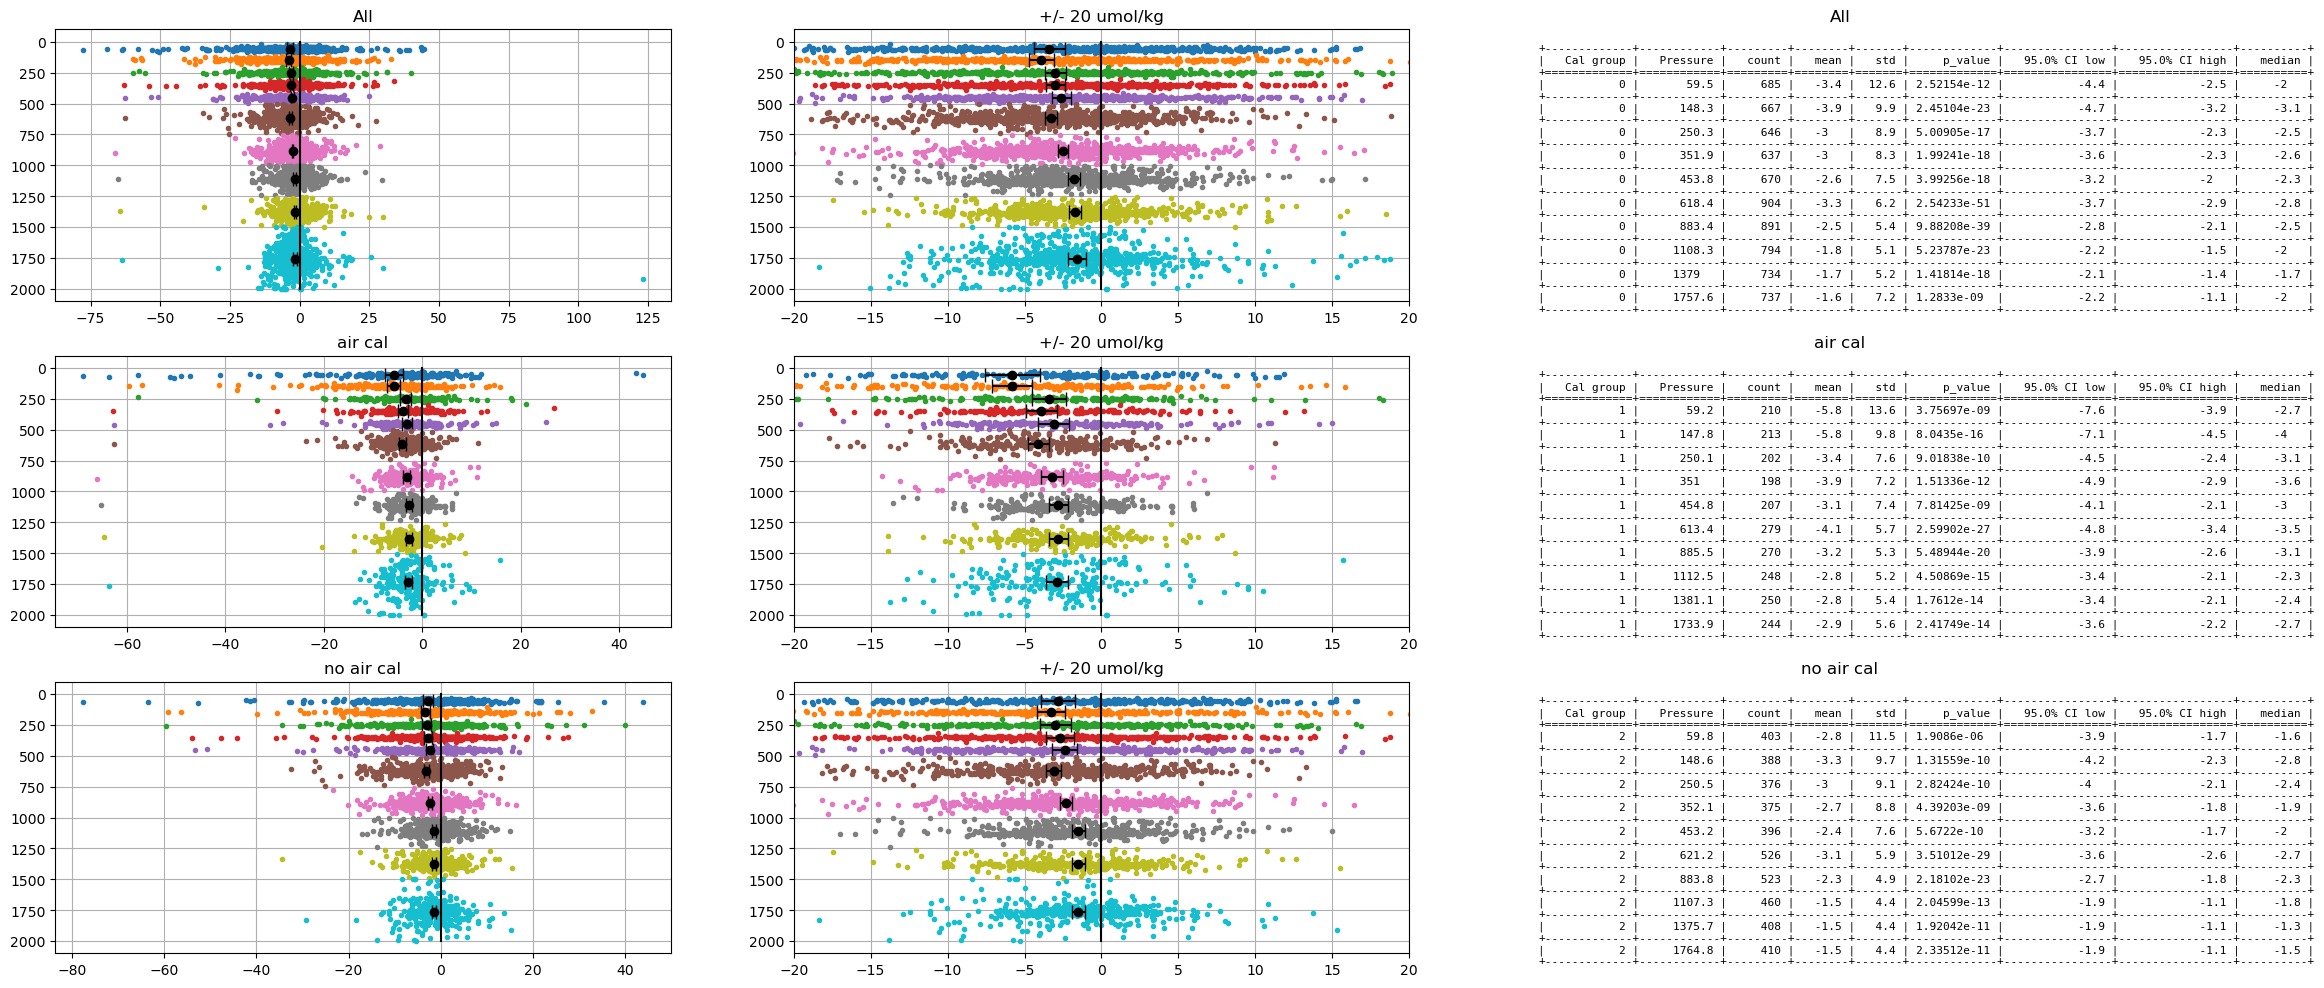

In [152]:
# want to loop through and save out all pressure values for each type (cal_group) so that I can make some synthesis plots
cal_groups = ['All', 'air cal', 'no air cal']
parameter_a = 'o2_calib_air_group'

# cal_groups = big_projects
# parameter_a = 'project_name'

# cal_groupsa  = o2_sensors
# parameter_= 'DOXY_sensor'

# cal_groups = data_centers
# parameter_a = 'data_centre'

CI_level = 0.95
o2_offset_data_table = []
fig = plt.figure(figsize=(27,len(cal_groups)*4))

for filename in glodap_offsets_filenames:

    
    for j in range(len(pressure_levels)-1):
        dataset_n = mean_gdap_offsets[filename][f'level_{pressure_levels[j]}']
        
        for idx, cal in enumerate(cal_groups):
            dataset_p = dataset_n.to_dataframe()
            offsets_o2_cal_group = dataset_p.groupby(parameter_a)
            # offsets_pH = dataset_p.groupby([parameter_a, parameter_b])

            if np.logical_and(idx==0, parameter_a=='o2_calib_air_group'):
                # print(idx)
                # print(cal)
                data_p = dataset_n.DOXY_ADJUSTED_offset_trimmed
                pressure_p = dataset_n.PRES_ADJUSTED_float
            else:
                temp_dataset = offsets_o2_cal_group.get_group(cal)
                data_p = temp_dataset.DOXY_ADJUSTED_offset_trimmed
                pressure_p = temp_dataset.PRES_ADJUSTED_float

            nmean = np.around(data_p.mean(), decimals=1)
            ncount = np.around(data_p.count(), decimals=1)
            nstd = np.around(data_p.std(), decimals=1)
            nmedian = np.around(data_p.median(), decimals=1)
        
            temp_var = data_p.copy()
            t_stat, p_value = stats.ttest_1samp(a=temp_var, popmean=0, nan_policy='omit') ############

            CI_vals = stats.norm.interval(alpha=CI_level, 
                            loc=np.nanmean(temp_var[~np.isnan(temp_var)].values), 
                            scale = stats.sem(temp_var[~np.isnan(temp_var)].values))
            CI_low = np.around(CI_vals[0], decimals=1)
            CI_high = np.around(CI_vals[1], decimals=1)
            ax1 = plt.subplot(len(cal_groups),3,(1+3*idx))
            plt.title(cal.strip())
            plt.plot(data_p, pressure_p,'.')
            plt.errorbar(nmean, pressure_p.mean(), xerr=nmean-CI_low, fmt='o', capsize=5,color='k')

            plt.grid('on')
            ax2 = plt.subplot(len(cal_groups),3,(2+3*idx))
            plt.title('+/- 20 umol/kg')
            plt.plot(data_p, pressure_p,'.')
            plt.errorbar(nmean, pressure_p.mean(), xerr=nmean-CI_low, fmt='o', capsize=5,color='k')

            npres = np.around(pressure_p.mean(), decimals=1)
            plt.xlim([-20, 20])
            plt.grid('on')
            o2_offset_data_table.append((idx, npres, ncount, nmean, nstd, p_value, CI_low, CI_high, nmedian))


for idx, cal in enumerate(cal_groups):
    plt.subplot(len(cal_groups),3,(1+3*idx))
    plt.gca().invert_yaxis()
    plt.plot([0,0], [0, 2000], 'k-')
    plt.subplot(len(cal_groups),3,(2+3*idx))
    plt.gca().invert_yaxis()
    plt.plot([0,0], [0, 2000], 'k-')


o2_offset_data_table = [row for row in o2_offset_data_table if not np.isnan(row[1])]
sorted_data_table = sorted(o2_offset_data_table, key=lambda x: x[0])

# base_value = 1
# increment = 3
# num_iterations = 10  

# for idx in range(num_iterations):
#     current_value = base_value + increment * idx
#     print(f"Index: {idx}, Value: {current_value}")

for idx, cal in enumerate(cal_groups):
    filtered_data_table = [row for row in sorted_data_table if row[0] == idx]
    # Create a string buffer to store the table
    table_buffer = StringIO()

    # Convert the o2_offset_data_table to a table and write it to the buffer
    print(tabulate(filtered_data_table, 
                   headers=['Cal group', 'Pressure', 'count',
                             'mean', 'std', 'p_value', 
                             str(CI_level*100) + '% CI low', str(CI_level*100) + '% CI high', 
                             'median'], tablefmt='grid'), file=table_buffer)

    # Display the table in a subplot
    plt.subplot(len(cal_groups),3,(3+3*idx))
    plt.title(cal.strip())

    plt.axis('off')  # Turn off axis for the table
    # plt.text(0.01, 0.01, table_buffer.getvalue(), va='top', ha='left', fontfamily='monospace', fontsize=8)
    plt.text(0.01, 0.95, table_buffer.getvalue(), va='top', ha='left', transform=plt.gca().transAxes, fontfamily='monospace', fontsize=8)
    
    # break

plot_filename = 'Offsets_vs_depth_grouped_' + parameter_a + '_year_filt_ ' + str(year_filt) +'_' + str(year_plus_minus)
plt.savefig(grouped_plot_dir + '../' + plot_filename + '.png')




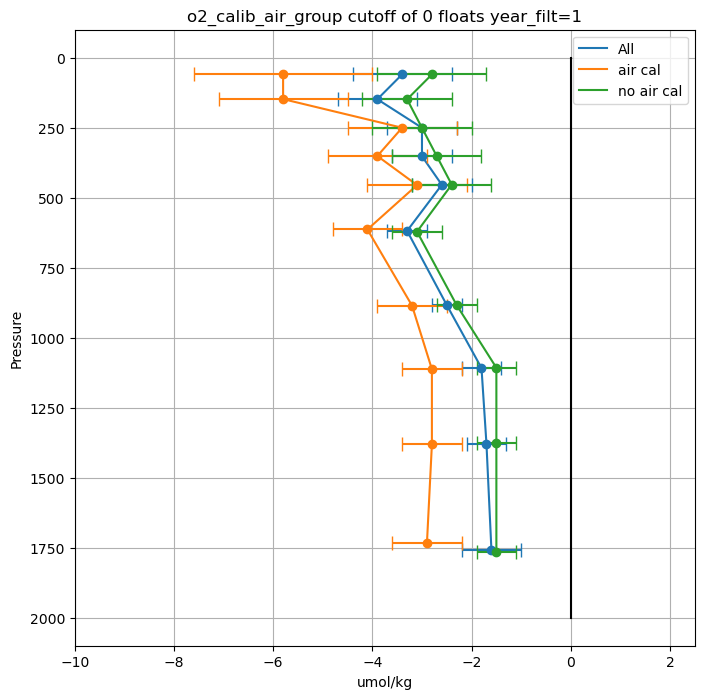

In [153]:

o2_offset_table_cal_groups = pd.DataFrame(columns=['Cal group','pressure','offset', 'CI_low', 'CI_high', 'n_count'])
for idx, cal in enumerate(cal_groups):
    filtered_data_table = [row for row in sorted_data_table if row[0] == idx]

    for i in range(0,len(filtered_data_table)):
        new_data_o2_direct_impact = [(cal.strip(), 
                                      filtered_data_table[i][1], 
                                      filtered_data_table[i][3],
                                      filtered_data_table[i][6],
                                      filtered_data_table[i][7],
                                      filtered_data_table[i][2])]
        new_data_o2_direct_impact_df = pd.DataFrame(new_data_o2_direct_impact, columns=['Cal group','pressure','offset', 'CI_low', 'CI_high', 'n_count'])
        o2_offset_table_cal_groups = pd.concat([o2_offset_table_cal_groups, new_data_o2_direct_impact_df], ignore_index=True)

if parameter_a=='project_name':
    n_cutoff= 30
    x_lim = [-25, 10]
elif parameter_a=='DOXY_sensor':
    n_cutoff = 20
    x_lim = [-15, 5]
elif parameter_a == 'o2_calib_air_group':
    n_cutoff = 0
    x_lim = [-10, 2.5]
elif parameter_a == 'data_centre':
    n_cutoff = 30
    x_lim = [-22, 5]


fig = plt.figure(figsize=(8,8))

for cal in cal_groups:
    temp_group = o2_offset_table_cal_groups[o2_offset_table_cal_groups['Cal group']==cal.strip()]

    if temp_group.n_count.values.mean()<n_cutoff:
        continue

    line, = plt.plot(temp_group.offset, temp_group.pressure, label=cal.strip())
    
    line_color = line.get_color()
    for i in range(0,len(temp_group)):
        plt.errorbar(temp_group.offset.values[i], temp_group.pressure.values[i], xerr=temp_group.offset.values[i]-temp_group.CI_low.values[i],
                      fmt='o', capsize=5, color=line_color)

plt.gca().invert_yaxis()
plt.plot([0,0], [0, 2000], 'k-')
plt.grid('on')
plt.xlim(x_lim)
plt.legend()
plt.title(parameter_a + ' cutoff of ' + str(n_cutoff) + ' floats' + ' year_filt=' + str(year_filt))
plt.xlabel('umol/kg')
plt.ylabel('Pressure')
plot_filename = 'Offsets_vs_depth_grouped_' + parameter_a + '_year_filt_ ' + str(year_filt) +'_' + str(year_plus_minus) + '_all_cutoff_' + str(n_cutoff)
plt.savefig(grouped_plot_dir + '../' + plot_filename + '.png')

In [106]:
temp_group.n_count.values.mean()

15.4

In [93]:
filtered_data_table

[(31, 55.7, 18, -2.7, 7.1, 0.12121201219528263, -6.0, 0.5, -2.4),
 (31, 147.9, 19, -1.7, 7.7, 0.3378341799967224, -5.2, 1.7, -1.5),
 (31, 246.6, 18, -2.7, 7.2, 0.1359615120970703, -6.0, 0.7, -2.8),
 (31, 353.9, 16, -4.4, 9.8, 0.09444584723708042, -9.2, 0.4, -4.4),
 (31, 452.7, 14, -3.4, 7.6, 0.1219191465904248, -7.4, 0.6, -3.9),
 (31, 611.9, 26, -3.6, 6.5, 0.009091589983398552, -6.1, -1.1, -3.5),
 (31, 896.4, 26, -2.8, 5.8, 0.020786368936747877, -5.0, -0.6, -1.9),
 (31, 1032.0, 8, -2.8, 2.2, 0.008579062027238292, -4.3, -1.3, -2.5),
 (31, 1401.7, 4, -4.5, 0.8, 0.0017406254635561273, -5.3, -3.6, -4.6),
 (31, 1800.3, 5, -5.1, 1.4, 0.0011595112811879403, -6.4, -3.9, -5.4)]

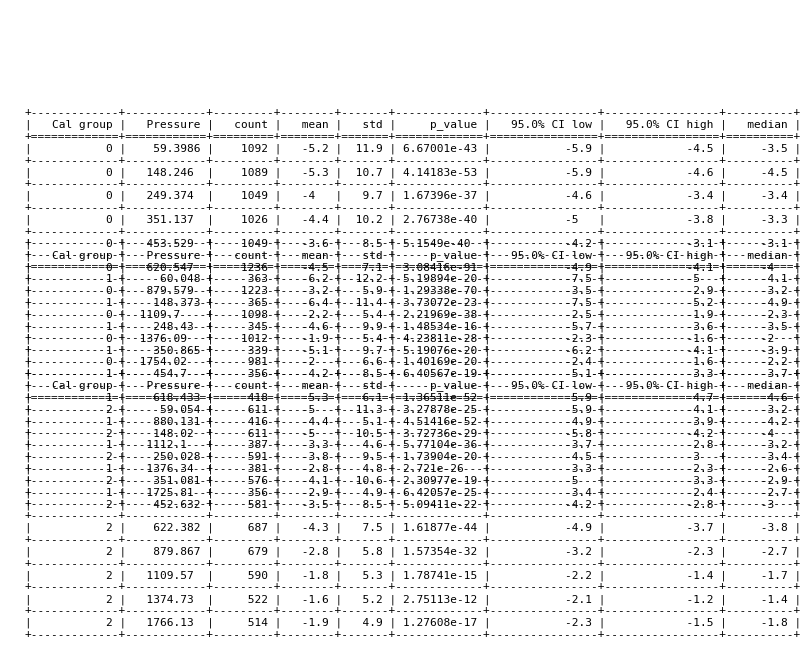

In [331]:
# Filter out rows with nan values in the first element
o2_offset_data_table = [row for row in o2_offset_data_table if not np.isnan(row[1])]
sorted_data_table = sorted(o2_offset_data_table, key=lambda x: x[0])

# base_value = 1
# increment = 3
# num_iterations = 10  # You can adjust this based on the number of iterations you need

# for idx in range(num_iterations):
#     current_value = base_value + increment * idx
#     print(f"Index: {idx}, Value: {current_value}")

for idx, cal in enumerate(cal_groups):
    filtered_data_table = [row for row in sorted_data_table if row[0] == idx]
    # print(cal)
    # print(tabulate(filtered_data_table, headers=['Cal group', 'Pressure', 'count', 'mean', 'std', 'p_value', str(CI_level*100) + '% CI low', str(CI_level*100) + '% CI high', 'median', 'min', 'max'], tablefmt='grid'))
    # Create a string buffer to store the table
    table_buffer = StringIO()

    # Convert the o2_offset_data_table to a table and write it to the buffer
    print(tabulate(filtered_data_table, headers=['Cal group', 'Pressure', 'count', 'mean', 'std', 'p_value', str(CI_level*100) + '% CI low', str(CI_level*100) + '% CI high', 'median'], tablefmt='grid'), file=table_buffer)

    # Display the table in a subplot
    plt.subplot(len(cal_groups),3,(1+3*idx))
    plt.axis('off')  # Turn off axis for the table
    plt.text(0.1, 0.1, table_buffer.getvalue(), va='top', ha='left', fontfamily='monospace', fontsize=8)
    # break

Index: 0, Value: 1
Index: 1, Value: 4
Index: 2, Value: 7
Index: 3, Value: 10
Index: 4, Value: 13
Index: 5, Value: 16
Index: 6, Value: 19
Index: 7, Value: 22
Index: 8, Value: 25
Index: 9, Value: 28


In [13]:
mean_gdap_offsets[filename]['level_0']

<xarray.Dataset>
Dimensions:                           (main_float_wmo: 1322)
Coordinates:
  * main_float_wmo                    (main_float_wmo) int64 1900722 ... 7901028
Data variables: (12/58)
    p_compare_min                     (main_float_wmo) float64 400.0 ... 400.0
    p_compare_max                     (main_float_wmo) float64 2.1e+03 ... 2....
    delta_dens                        (main_float_wmo) float64 0.005 ... 0.005
    delta_spice                       (main_float_wmo) float64 0.005 ... 0.005
    delta_press                       (main_float_wmo) float64 100.0 ... 100.0
    dist                              (main_float_wmo) float64 100.0 ... 100.0
    ...                                ...
    pH_sensor                         (main_float_wmo) object 'none' ... 'SUN...
    nitrate_group                     (main_float_wmo) object 'no nitrate' .....
    nitrate_sensor                    (main_float_wmo) object 'none' ... 'SUN...
    DOXY_group                        (main_float_wmo) object 'DOXY' ... 'DOXY'
    DOXY_sensor                       (main_float_wmo) object 'AANDERAA_OPTOD...
    ice_group                         (main_float_wmo) object 'no ice' ... 'n...

In [252]:
print(big_projects)

['                                                                ', 'ARGO Italy                                                      ', 'ARGO Norway                                                     ', 'Argo Australia', 'Argo Australia                                                  ', 'Argo Canada                                                     ', 'Argo INDIA                                                      ', 'Argo equivalent                                                 ', 'AtlantOS                                                        ', 'CHINA ARGO EQUIVALENT                                           ', 'CORIOLIS                                                        ', 'CORIOLIS_OVIDE                                                  ', 'GMMC OVIDE                                                      ', 'GMMC_CNES                                                       ', 'GO-BGC, WHOI                                                    ', 'IFM-GEOMAR                  

In [243]:
grouped_data = dataset_n.groupby('project_name')

# Get the group names and the counts of data within each group
group_names = grouped_data.groups.keys()
# group_counts = grouped_data.size()

# Display the group names and counts
for group_name, count in zip(group_names, group_counts):
    print(f"Group Name: {group_name}, Count: {count}")

AttributeError: 'DatasetGroupBy' object has no attribute 'size'

In [228]:
for cal_group, group_data in o2_offset_data_table.groupby('Cal group'):
    sorted_data = group_data.sort_values(by='Cal group')  # Sort by 'Cal group' column
    print(tabulate(sorted_data, headers=['Cal group', 'Pressure', 'count', 'mean', 'std', 'p_value', str(CI_level*100) + '% CI low', str(CI_level*100) + '% CI high', 'median', 'min', 'max'], tablefmt='grid'))



AttributeError: 'list' object has no attribute 'groupby'

In [235]:
o2_offset_data_table = [row for row in o2_offset_data_table if not np.isnan(row[1])]

print(o2_offset_data_table)


[(0, <xarray.DataArray 'PRES_ADJUSTED_float' ()>
array(59.39858257), <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(1092), <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(-5.2), <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(11.9), 6.670009390917223e-43, -5.9, -4.5, <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(-3.5)), (1, 60.04803358757682, 363, -6.2, 12.2, 5.198944592076658e-20, -7.5, -5.0, -4.1), (2, 60.04803358757682, 363, -6.2, 12.2, 5.198944592076658e-20, -7.5, -5.0, -4.1), (0, <xarray.DataArray 'PRES_ADJUSTED_float' ()>
array(148.24590744), <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(1089), <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(-5.3), <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(10.7), 4.141828089338084e-53, -5.9, -4.6, <xarray.DataArray 'DOXY_ADJUSTED_offset_trimmed' ()>
array(-4.5)), (1, 148.37346879019643, 365, -6.4, 11.4, 3.730719108011515e-23, -7.5, -5.2, -4.9), (2, 148.3734687

In [263]:
# Filter out rows with nan values in the first element
o2_offset_data_table = [row for row in o2_offset_data_table if not np.isnan(row[1])]
sorted_data_table = sorted(o2_offset_data_table, key=lambda x: x[0])

for idx, cal in enumerate(cal_groups):
    filtered_data_table = [row for row in sorted_data_table if row[0] == idx]
    print(cal)
    print(tabulate(filtered_data_table, headers=['Cal group', 'Pressure', 'count', 'mean', 'std', 'p_value', str(CI_level*100) + '% CI low', str(CI_level*100) + '% CI high', 'median', 'min', 'max'], tablefmt='grid'))



                                                                
+-------------+------------+---------+--------+-------+-------------+----------------+-----------------+----------+
|   Cal group |   Pressure |   count |   mean |   std |     p_value |   95.0% CI low |   95.0% CI high |   median |
+=============+============+=========+========+=======+=============+================+=================+==========+
|           0 |    59.3986 |    1092 |   -5.2 |  11.9 | 6.67001e-43 |           -5.9 |            -4.5 |     -3.5 |
+-------------+------------+---------+--------+-------+-------------+----------------+-----------------+----------+
|           0 |   148.246  |    1089 |   -5.3 |  10.7 | 4.14183e-53 |           -5.9 |            -4.6 |     -4.5 |
+-------------+------------+---------+--------+-------+-------------+----------------+-----------------+----------+
|           0 |   249.374  |    1049 |   -4   |   9.7 | 1.67396e-37 |           -4.6 |            -3.4 |     -3.4 |
+------

/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/site-packages/tabulate/__init__.py:827: UserWarning: Warning: converting a masked element to nan.
  conv(string)
/Users/smb-uh/opt/anaconda3/envs/float_bgc_synthesis_products/lib/python3.9/site-packages/tabulate/__init__.py:1232: UserWarning: Warning: converting a masked element to nan.
  return format(float(val), floatfmt)


In [230]:
row

NameError: name 'row' is not defined

In [66]:
# now for one dataset you have glodap_offsets_mean saved for each pressure level - need to do for all datasets 
trimmed_means['level_200']

<xarray.Dataset>
Dimensions:                           (main_float_wmo: 8)
Coordinates:
  * main_float_wmo                    (main_float_wmo) int64 1901154 ... 5906312
Data variables: (12/58)
    p_compare_min                     (main_float_wmo) float64 1.0 1.0 ... 1.0
    p_compare_max                     (main_float_wmo) float64 550.0 ... 550.0
    delta_dens                        (main_float_wmo) float64 0.1 0.1 ... 0.1
    delta_spice                       (main_float_wmo) float64 0.1 0.1 ... 0.1
    delta_press                       (main_float_wmo) float64 50.0 ... 50.0
    dist                              (main_float_wmo) float64 100.0 ... 100.0
    ...                                ...
    pH_sensor                         (main_float_wmo) object 'none' ... 'ISU...
    nitrate_group                     (main_float_wmo) object 'no nitrate' .....
    nitrate_sensor                    (main_float_wmo) object 'none' ... 'ISU...
    DOXY_group                        (main_float_wmo) object 'DOXY' ... 'DOXY'
    DOXY_sensor                       (main_float_wmo) object 'AANDERAA_OPTOD...
    ice_group                         (main_float_wmo) object 'no ice' ... 'n...